# Data preparation

In [3]:
RANDOM_SEED = 42

## Load the data

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [6]:
print(type(data), data.keys(), sep="\n", )

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## Split the data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_X, test_X, train_y, test_y = train_test_split(
    data.data, data.target,
    test_size = .3,
    random_state = RANDOM_SEED,
)

## Preprocess the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [11]:
examples_n, features_n = data.data.shape

# Training

## Build the model

In [12]:
import tensorflow as tf

In [13]:
tf.random.set_seed(RANDOM_SEED)

In [14]:
model = tf.keras.models.Sequential(
    layers = [
        tf.keras.layers.Input(shape=(features_n, ), ),
        tf.keras.layers.Dense(units=1, activation="sigmoid", ),
    ]
)

In [15]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy",],
)

## Train the model

In [16]:
r = model.fit(
    x= train_X,
    y= train_y,
    validation_data= (test_X, test_y),
    epochs=100,
)

Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 0.6798 - accuracy: 0.5628 - val_loss: 0.6278 - val_accuracy: 0.6316
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6041 - accuracy: 0.6583 - val_loss: 0.5610 - val_accuracy: 0.7368
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.7312 - val_loss: 0.5029 - val_accuracy: 0.7836
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4919 - accuracy: 0.8015 - val_loss: 0.4562 - val_accuracy: 0.8246
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4507 - accuracy: 0.8518 - val_loss: 0.4168 - val_accuracy: 0.8596
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4165 - accuracy: 0.8719 - val_loss: 0.3844 - val_accuracy: 0.9064
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3880 - accuracy: 0.8894 - val_loss: 0.3576 - val_accuracy: 0.9123
Epoch 8/100


## Evaluate the model

In [17]:
print("Training score: ", model.evaluate(train_X, train_y))
print("Validation score: ", model.evaluate(test_X, test_y))

13/13 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.9749
Training score:  [0.09869495779275894, 0.9748743772506714]
6/6 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.9883
Validation score:  [0.07312221080064774, 0.988304078578949]


In [18]:
from matplotlib import pyplot as plt

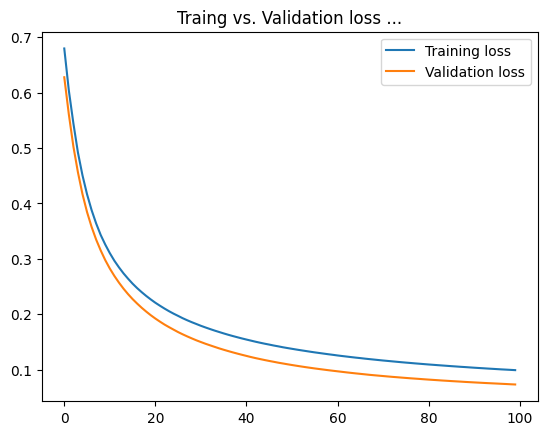

In [19]:
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Traing vs. Validation loss ...")
plt.show()

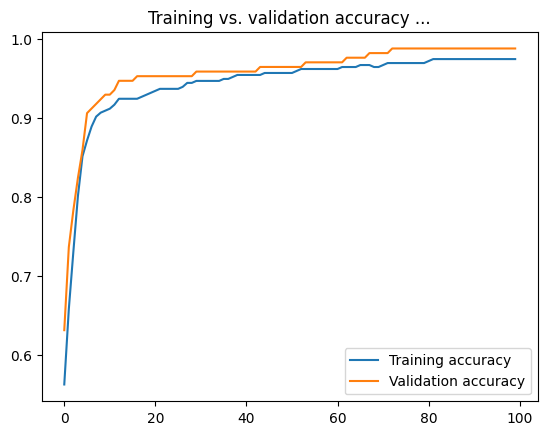

In [20]:
plt.plot(r.history['accuracy'], label="Training accuracy")
plt.plot(r.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Training vs. validation accuracy ...")
plt.show()

# Prediction

In [21]:
import numpy as np

In [24]:
probs = model.predict(test_X, verbose=0)
# Extract classes
probs = probs.round().flatten()

In [25]:
print(f"Comparaison of predicted vs. actual {probs == test_y}")
print(f"Evaluate the output: {model.evaluate(test_X, test_y)}")

Comparaison of predicted vs. actual [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  T

In [28]:
print(f"Comparaison of predicted vs. actual {(probs == test_y).sum() / probs.shape[0]:.3f}%")

Comparaison of predicted vs. actual 0.988%


In [29]:
model.save('breast_cancer_linear_classifer.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
